# Курс "Алгортимы анализа данных"

## Практическое задание урока 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

### Задание 1

**Задание 1.1.** Модифицировать реализацию линейной регрессии из предыдущего урока, добавив l2 регуляризационную поправку к штрафной функции: +𝑐∗∑(𝑤_j)^2 и соответствующую к выражению для производной.

**Решение**

In [20]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

In [22]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred, c=0.1):
    y = X.dot(w)
    # c*w.dot(w.T) - регуляризационная поправка
    # коэффициент c взяли по умолчанию равным 0.1
    return (sum((y - y_pred)**2)) / len(y) + c*w.dot(w.T)

def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

В случае использования нормального уравнения функционал ошибки составляет 0.423


In [23]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
alpha = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

def grad(x, w, y, c):
    # 2*c*w - регуляризационная поправка
    return np.dot(x.T, (np.dot(x, w) - y)) / y.shape[0] + 2*c*w

# ход градиентного спуска
w = np.zeros(n_features)
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  alpha * 2 * grad(X, w, Y, 0.1)  # коэффициент c=0.1
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    cur_error=mserror(X, new_w, Y, 0.1)  # коэффициент c=0.1
    print(cur_error)
    errors.append(cur_error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)


13.529379888605757
6.139008738742784
2.927683172573783
1.528124990631707
0.9154988454359352
0.6456112502813124
0.5256033609357633
0.47152764715650974
0.44670679516840445
0.4350280931335069
0.4293562480021702
0.4264949584074699
0.42498906888739263
0.4241613267772819
0.42368731935644216
0.4234060304590083
0.42323421009048334
0.42312690675660214
0.423058798495822
0.4230150676754213
0.42298676386322287
0.42296834456723603
0.4229563134461838
0.42294843536407256
0.4229432680750611
0.4229398749782464
0.42293764519028565
0.42293617910117776
0.422935214788818
0.422934580349253
0.42293416285729046
0.4229338880857201
0.4229337072231961
0.42293358816198756
0.4229335097772212
0.42293345816774386
0.42293342418474456
0.4229334018064329
0.42293338706886796
0.42293337736249903
0.4229333709692642
0.4229333667579516
0.422933363983687
0.42293336215595756


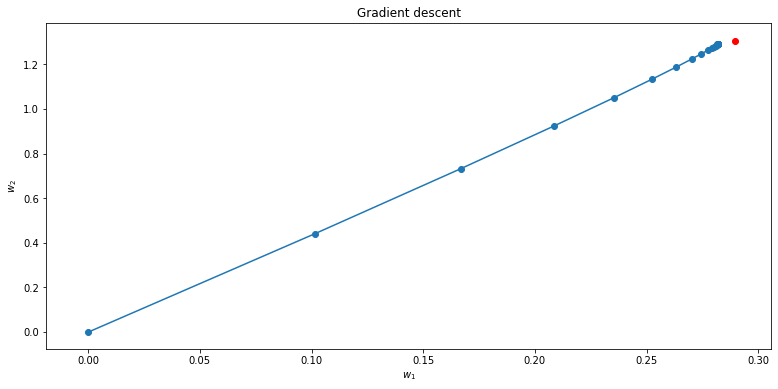

In [25]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

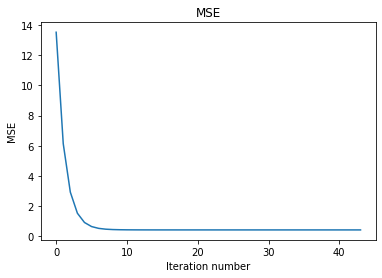

In [26]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

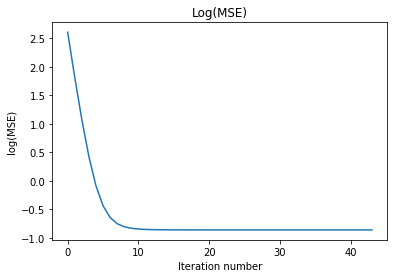

In [27]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

**Задание 1.2.** Опробовать реализацию на примере с полиномиальными фичами 6го порядка из данного урока. При каком значении С в воспроизводимой функции не будет воспроизводить несуществующий минимум в окрестностях x=7,5?

**Решение**

Пример: Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [28]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

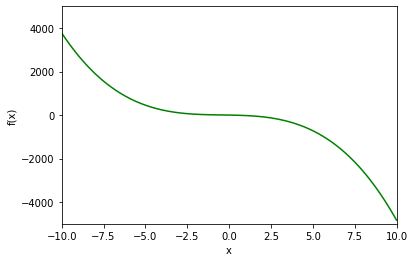

In [29]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [30]:
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

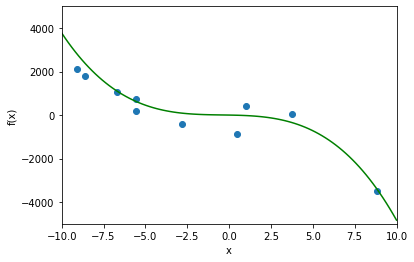

In [31]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

Теперь попробуем создать модель, способную восстановить исходную зависимость.

In [32]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# создадим модель 6-й степени
sixth_degree_regressor = make_pipeline(PolynomialFeatures(degree=6), linear_model.LinearRegression())

# обучим ее
sixth_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [33]:
# выведем полученные веса при признаках и свободный коэффициент
print(sixth_degree_regressor.named_steps.linearregression.coef_)
print(sixth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  3.18714291e+02  5.91424507e+01 -2.19724981e+01
 -2.73548014e+00  1.79059852e-01  2.46511203e-02]
-441.3664888532876


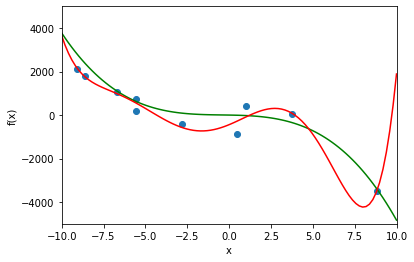

In [34]:
# Нанесем полученную зависимость на график
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, sixth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

In [80]:
# создадим модель 6-й степени с регуляризацией
sixth_reg_degree_regressor = make_pipeline(PolynomialFeatures(degree=6), linear_model.Ridge(alpha=0.4))

# обучим ее
sixth_reg_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=0.4, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

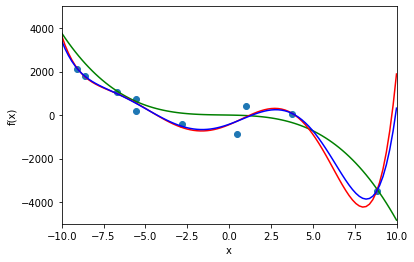

In [81]:
# Нанесем полученную зависимость на график
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

plt.plot(dots, sixth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r')
plt.plot(dots, sixth_reg_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='b')

In [82]:
# создадим модель 6-й степени с регуляризацией
sixth_reg_degree_regressor = make_pipeline(PolynomialFeatures(degree=6), linear_model.Ridge(alpha=1))

# обучим ее
sixth_reg_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

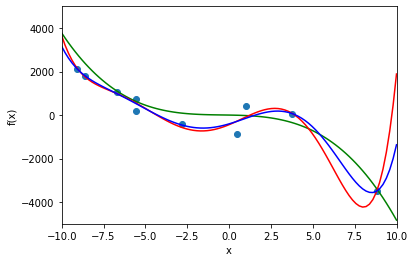

In [83]:
# Нанесем полученную зависимость на график
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

plt.plot(dots, sixth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r')
plt.plot(dots, sixth_reg_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='b')

**Ответ:** при C=0.4 модель воспроизводит локальный минимум, но уже не в точке 7.5. Более лучший результат достигается при C=1.0

### Задание 2

Модифицировать пример со стохастическим градиентом из этого урока, реализовав в нём расчёт градиента по десяти случайно выбираемым объектам (mini-batch градиент).

- ЗАДАНИЕ НЕ ВЫПОЛНЕНО

**Решение**

Реализуем стохастический градиентный спуск.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

Отмасштабируем получившиеся признаки методом стандартизации.

In [3]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [4]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Подготовка данных и средств проверки закончена.

### Стохастический градиентный спуск

In [20]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
alpha = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# функция для генерации одного и того же случайного числа
np.random.seed(1234)  

# ход градиентного спуска (уменьшаем на каждой итерации ошибку только на одном объекте)
while weight_dist > min_weight_dist and iter_num < max_iter:
     
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * alpha * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    error=mserror(data, new_w, target)
    errors.append(error)
    if iter_num %1000==0:
        print(error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

8190.666400278678
7868.753582703475
7552.176708022045
7259.789173320224
6978.842338857329
6711.147732739624
6465.024549418812
6193.478468202817
5952.161582141672
5739.3796873030105
5523.839223473497
5325.932157005784
5129.163500347651
4933.476091014136
4740.948807699323
4560.0636957114275
4389.471806845338
4222.841072793941
4057.27949070885
3883.22606736391
3730.1032823480377
3587.853308872341
3445.0583250162367
3327.479598923909
3196.3267522188453
3069.9410087470965
2944.961180766486
2825.302164209918
2714.644474373037
2605.4646800664736
2501.4991915348905
2403.138363888203
2311.435369461309
2227.2752643200065
2140.365610877901
2067.702935726182
1987.5459166793892
1907.6856964699145
1831.744304944092
1761.107616288086
1692.0716424918924
1629.5493937699832
1572.5943618285678
1513.61590582835
1455.1174954572207
1401.943729514938
1351.7369963721633
1295.4569356472489
1245.394602285046
1199.059107707529
1153.3476244994463
1109.8075842814014
1068.0603086692986
1030.9713642382635
993.309685

In [21]:
# список векторов весов в результате стохастического градиентного спуска
w_list

array([[ 0.00000000e+00,  0.00000000e+00],
       [-8.77049099e-04,  1.16866253e-03],
       [-3.96127668e-04,  1.28968368e-03],
       ...,
       [ 5.15102654e+01,  5.68746598e+01],
       [ 5.15106202e+01,  5.68746459e+01],
       [ 5.15106202e+01,  5.68746459e+01]])

###  Мини-пакетный градиентый спуск (mini-batch)

In [34]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
alpha = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# функция для генерации 10-ти случайных чисел из 1000
a=np.random.randint(1000, size=10)

# создадим mini-batch
i = np.array(a)
X = data[i]

# ход градиентного спуска (уменьшаем на каждой итерации ошибку на объектах из mini-batch)
while weight_dist > min_weight_dist and iter_num < max_iter:
     
    # генерируем случайный индекс объекта выборки (стохастический градиентый спуск)
#    train_ind = np.random.choice(a)

    # так не надо делать mini-batch градиентый спуск
#    train_ind = np.random.randint(data.shape[0])

    # мини-пакетный градиентый спуск (mini-batch)
    new_w = w - 2 * alpha * np.dot(X.T, (np.dot(X, w) - target[i])) / target.shape[0]
    
    # стохастический градиентый спуск
#    new_w = w - 2 * alpha * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    
    # пакетный градиентный спуск
    #    new_w = w -  alpha * 2 * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]  
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)
        
    w_list.append(new_w.copy())
    error=mserror(data, new_w, target)
    errors.append(error)
    if iter_num %1000==0:
        print(error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования mini-batch градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

8184.644114641804
3920.497887557403
1905.365457367679
946.1545188400883
485.2597814395193
261.1949315182071
150.75062696932096
95.48576574485979
67.42873551732733
53.02989175676518
45.62377856356154
41.86875740404378
40.05220176494036
39.27511665569377
39.05425370051448
39.124371053130936
39.337715756309166
39.61155702416963
39.899991849181625
40.17833696341293
40.43424397434448
40.662520303103626
40.86205663438891
41.033985557822064
41.180576473691644
41.30457823007235
41.4088367597124
41.49608210275936
41.568819255520594
41.62928177830997
41.67942235641675
41.72092414279395
41.75522284133642
41.78353340180979
41.80687769002112
41.82611107476551
41.84194686034456
41.85497809960353
41.865696683814555
41.87450981130984
41.8817540443135
41.887707210705024
41.89259841854068
41.8966164416942
41.89991671466298
41.902627149425655
41.904852960924394
41.90668066226623
41.908181367273116
41.909413516941946
41.9104251279668
41.91125564553163
41.91193746894974
41.9124972072201
41.912956711828
41.

In [35]:
# список векторов весов в результате мини-пакетного градиентного спуска (mini-batch)
w_list

array([[0.00000000e+00, 0.00000000e+00],
       [2.01089748e-02, 2.77127441e-02],
       [4.02110267e-02, 5.54144256e-02],
       ...,
       [6.29055066e+01, 6.66106991e+01],
       [6.29055066e+01, 6.66106991e+01],
       [6.29055066e+01, 6.66106991e+01]])